### Prerequisites

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0          conda-forge
    geopy:           

### Downtown Toronto coordinates

In [2]:
address = 'Downtown Toronto, CA'
geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Downtown Toronto, CA are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Downtown Toronto, CA are 43.6563221, -79.3809161.


### Downltown Toronto map

In [3]:
# create map of Downtown Toronto, CA, using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)
map_toronto

### Defining Foresquare credentials

In [4]:
CLIENT_ID = 'UVSCUVVCDCWMZPK1XMQQK5XAWAL5BAHH3UXSHYSMEG0A1HYF' # your Foursquare ID
CLIENT_SECRET = 'JG11LJH3TZD15NLIQKRTG2CCGYIPNHNV1FH4OTMHCIBBYM1B' # your Foursquare Secret
VERSION = '20200801' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: UVSCUVVCDCWMZPK1XMQQK5XAWAL5BAHH3UXSHYSMEG0A1HYF
CLIENT_SECRET:JG11LJH3TZD15NLIQKRTG2CCGYIPNHNV1FH4OTMHCIBBYM1B


### Search all restaurants in Downtown Toronto

In [10]:
search_query = 'Restaurant'
radius = 700
LIMIT = 100
print(search_query + ' .... OK!')

Restaurant .... OK!


In [11]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=UVSCUVVCDCWMZPK1XMQQK5XAWAL5BAHH3UXSHYSMEG0A1HYF&client_secret=JG11LJH3TZD15NLIQKRTG2CCGYIPNHNV1FH4OTMHCIBBYM1B&ll=43.6563221,-79.3809161&v=20200801&query=Restaurant&radius=700&limit=100'

In [12]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f42bf8b8758c95cfea0de2a'},
 'response': {'venues': [{'id': '4ad4c05ff964a52048f720e3',
    'name': 'Hemispheres Restaurant & Bistro',
    'location': {'address': '110 Chestnut Street',
     'lat': 43.65488413420439,
     'lng': -79.38593077371578,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.65488413420439,
       'lng': -79.38593077371578}],
     'distance': 434,
     'postalCode': 'M5G 1R3',
     'cc': 'CA',
     'city': 'Toronto',
     'state': 'ON',
     'country': 'Canada',
     'formattedAddress': ['110 Chestnut Street',
      'Toronto ON M5G 1R3',
      'Canada']},
    'categories': [{'id': '4bf58dd8d48988d14e941735',
      'name': 'American Restaurant',
      'pluralName': 'American Restaurants',
      'shortName': 'American',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1598209995',
    'hasPerk': False},
   {'id': '

In [13]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
tor_foodall = json_normalize(venues)
tor_foodall.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d14e941735', 'name': 'A...",False,4ad4c05ff964a52048f720e3,110 Chestnut Street,CA,Toronto,Canada,NaN,434,"[110 Chestnut Street, Toronto ON M5G 1R3, Canada]","[{'label': 'display', 'lat': 43.65488413420439...",43.654884,-79.385931,NaN,M5G 1R3,ON,Hemispheres Restaurant & Bistro,v-1598209995,NaN
1,"[{'id': '4bf58dd8d48988d143941735', 'name': 'B...",False,4bd47e6fcfa7b7139f2924da,389 Church St.,CA,Toronto,Canada,at Carlton St.,590,"[389 Church St. (at Carlton St.), Toronto ON M...","[{'label': 'display', 'lat': 43.66150015906530...",43.661500,-79.379319,NaN,M5B,ON,Studio Restaurant,v-1598209995,NaN
2,"[{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...",False,4fbbb3ace4b01e39077b4d55,220 Yonge St.,CA,Toronto,Canada,in Toronto Eaton Centre Urban Eatery,49,[220 Yonge St. (in Toronto Eaton Centre Urban ...,"[{'label': 'display', 'lat': 43.65596504293232...",43.655965,-79.380541,NaN,NaN,ON,Akashiro Japanese Restaurant & Bar,v-1598209995,NaN
3,"[{'id': '4bf58dd8d48988d149941735', 'name': 'T...",False,4ad4c05ff964a52018f720e3,338 Jarvis St.,CA,Toronto,Canada,north of Carlton Street,787,"[338 Jarvis St. (north of Carlton Street), Tor...","[{'label': 'display', 'lat': 43.66277006654972...",43.662770,-79.376894,NaN,M4Y 2G6,ON,Cottage Restaurant & Lounge,v-1598209995,NaN
4,"[{'id': '4bf58dd8d48988d14e941735', 'name': 'A...",False,4edbccaaf9abeea3db5268df,NaN,CA,NaN,Canada,NaN,51,[Canada],"[{'label': 'display', 'lat': 43.65610066909799...",43.656101,-79.381480,NaN,NaN,NaN,Terrace Restaurant at Elmwood,v-1598209995,NaN


In [14]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in tor_foodall.columns if col.startswith('location.')] + ['id']
tor_foodall_filtered = tor_foodall.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
tor_foodall_filtered['categories'] = tor_foodall_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
tor_foodall_filtered.columns = [column.split('.')[-1] for column in tor_foodall_filtered.columns]

tor_foodall_filtered.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Hemispheres Restaurant & Bistro,American Restaurant,110 Chestnut Street,CA,Toronto,Canada,NaN,434,"[110 Chestnut Street, Toronto ON M5G 1R3, Canada]","[{'label': 'display', 'lat': 43.65488413420439...",43.654884,-79.385931,NaN,M5G 1R3,ON,4ad4c05ff964a52048f720e3
1,Studio Restaurant,Breakfast Spot,389 Church St.,CA,Toronto,Canada,at Carlton St.,590,"[389 Church St. (at Carlton St.), Toronto ON M...","[{'label': 'display', 'lat': 43.66150015906530...",43.661500,-79.379319,NaN,M5B,ON,4bd47e6fcfa7b7139f2924da
2,Akashiro Japanese Restaurant & Bar,Sushi Restaurant,220 Yonge St.,CA,Toronto,Canada,in Toronto Eaton Centre Urban Eatery,49,[220 Yonge St. (in Toronto Eaton Centre Urban ...,"[{'label': 'display', 'lat': 43.65596504293232...",43.655965,-79.380541,NaN,NaN,ON,4fbbb3ace4b01e39077b4d55
3,Cottage Restaurant & Lounge,Thai Restaurant,338 Jarvis St.,CA,Toronto,Canada,north of Carlton Street,787,"[338 Jarvis St. (north of Carlton Street), Tor...","[{'label': 'display', 'lat': 43.66277006654972...",43.662770,-79.376894,NaN,M4Y 2G6,ON,4ad4c05ff964a52018f720e3
4,Terrace Restaurant at Elmwood,American Restaurant,NaN,CA,NaN,Canada,NaN,51,[Canada],"[{'label': 'display', 'lat': 43.65610066909799...",43.656101,-79.381480,NaN,NaN,NaN,4edbccaaf9abeea3db5268df


In [15]:
print('{} venues were returned by Foursquare.'.format(tor_foodall_filtered.shape[0]))

50 venues were returned by Foursquare.


In [16]:
tor_catall=tor_foodall_filtered.groupby('categories').count()
tor_catall.head()

,name,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
categories,,,,,,,,,,,,,,,
American Restaurant,2,1,2,1,2,0,2,2,2,2,2,0,1,1,2
Asian Restaurant,4,3,4,4,4,3,4,4,4,4,4,0,2,4,4
Bistro,1,1,1,1,1,0,1,1,1,1,1,0,0,1,1
Breakfast Spot,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
Caribbean Restaurant,2,0,2,1,2,0,2,2,2,2,2,0,0,1,2


In [17]:
print('There are {} uniques restaurant categories.'.format(len(tor_foodall_filtered['categories'].unique())))

There are 22 uniques restaurant categories.


In [27]:
venuesall_map = folium.Map(location=[latitude, longitude], zoom_start=13)
# add a magenta circle marker to represent Toronto
folium.features.CircleMarker(
    [latitude, longitude],
    radius=100,
    color='magenta',
    popup='Toronto',
    fill = True,
    fill_color = 'magenta',
    fill_opacity = 0.1
).add_to(venuesall_map)

for lat, lng, label in zip(tor_foodall_filtered['lat'], tor_foodall_filtered['lng'], tor_foodall_filtered['categories']):
        folium.features.CircleMarker(
            [lat, lng],
            radius=5,
            poup=label,
            fill=True,
            color='gray',
            fill_color='cyan',
            fill_opacity=0.6
        ).add_to(venuesall_map)
        
venuesall_map

### Search Italian, Greek and Meditteranean restaurants in Downtown Toronto

In [28]:
#Italian Restaurant = 4bf58dd8d48988d110941735
#Greek Restaurant = 4bf58dd8d48988d10e941735
#Meditteranean Restaurant = 4bf58dd8d48988d1c0941735

categoryId = '4bf58dd8d48988d110941735,4bf58dd8d48988d10e941735,4bf58dd8d48988d1c0941735'
radius = 700
LIMIT = 100
print(categoryId + ' .... OK!')

4bf58dd8d48988d110941735,4bf58dd8d48988d10e941735,4bf58dd8d48988d1c0941735 .... OK!


### Get Foursqare url

In [29]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, categoryId, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=UVSCUVVCDCWMZPK1XMQQK5XAWAL5BAHH3UXSHYSMEG0A1HYF&client_secret=JG11LJH3TZD15NLIQKRTG2CCGYIPNHNV1FH4OTMHCIBBYM1B&ll=43.6563221,-79.3809161&v=20200801&categoryId=4bf58dd8d48988d110941735,4bf58dd8d48988d10e941735,4bf58dd8d48988d1c0941735&radius=700&limit=100'

### Examine the results

In [30]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f42c2d0edbb5d071181e123'},
 'response': {'venues': [{'id': '4bce340fb6c49c74c8c79691',
    'name': 'Opa! Souvlaki of Greece',
    'location': {'address': '10 Dundas St. E.',
     'crossStreet': '2nd Floor in Yonge Dundas Square',
     'lat': 43.65618684017071,
     'lng': -79.3809212882352,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.65618684017071,
       'lng': -79.3809212882352}],
     'distance': 15,
     'postalCode': 'M5B 2G9',
     'cc': 'CA',
     'city': 'Toronto',
     'state': 'ON',
     'country': 'Canada',
     'formattedAddress': ['10 Dundas St. E. (2nd Floor in Yonge Dundas Square)',
      'Toronto ON M5B 2G9',
      'Canada']},
    'categories': [{'id': '4bf58dd8d48988d10e941735',
      'name': 'Greek Restaurant',
      'pluralName': 'Greek Restaurants',
      'shortName': 'Greek',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/greek_',
       'suffix': '.png'},
      'primary': True}],
    '

### Convert the results into Pandas Dataframe

In [31]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
tor_food = json_normalize(venues)
tor_food.head(5)

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d10e941735', 'name': 'G...",False,4bce340fb6c49c74c8c79691,10 Dundas St. E.,CA,Toronto,Canada,2nd Floor in Yonge Dundas Square,15,[10 Dundas St. E. (2nd Floor in Yonge Dundas S...,"[{'label': 'display', 'lat': 43.65618684017071...",43.656187,-79.380921,NaN,M5B 2G9,ON,Opa! Souvlaki of Greece,v-1598211222,NaN
1,"[{'id': '4bf58dd8d48988d10e941735', 'name': 'G...",False,4e8889c961afee1b75b4cc4a,220 Yonge St.,CA,Toronto,Canada,"in Urban Eatery, Toronto Eaton Centre",202,"[220 Yonge St. (in Urban Eatery, Toronto Eaton...","[{'label': 'display', 'lat': 43.6545029224916,...",43.654503,-79.380888,NaN,M5B 2H1,ON,Jimmy The Greek,v-1598211222,NaN
2,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",False,5372b900498e1ecf3da2bcaa,"220 Yonge St, Toronto Eaton Centre",CA,Toronto,Canada,Eaton Centre,251,"[220 Yonge St, Toronto Eaton Centre (Eaton Cen...","[{'label': 'display', 'lat': 43.654064, 'lng':...",43.654064,-79.380696,NaN,M5B 2H1,ON,Villa Madina,v-1598211222,NaN
3,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",False,5e594c8a3de308000870c948,15 Elm Street,CA,Toronto,Canada,NaN,197,"[15 Elm Street, Toronto ON M5G 1G7, Canada]","[{'label': 'display', 'lat': 43.65769, 'lng': ...",43.657690,-79.382480,NaN,M5G 1G7,ON,Elm Street Italian Deli,v-1598211222,NaN
4,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",False,4d306dd82748b60c62b6dba0,220 Yonge St.,CA,Toronto,Canada,in Toronto Eaton Centre,208,"[220 Yonge St. (in Toronto Eaton Centre), Toro...","[{'label': 'display', 'lat': 43.65445314470199...",43.654453,-79.380974,NaN,M5B 3H7,ON,Trattoria Mercatto,v-1598211222,NaN


### Filter dataframe

In [32]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in tor_food.columns if col.startswith('location.')] + ['id']
tor_food_filtered = tor_food.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
tor_food_filtered['categories'] = tor_food_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
tor_food_filtered.columns = [column.split('.')[-1] for column in tor_food_filtered.columns]

tor_food_filtered.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Opa! Souvlaki of Greece,Greek Restaurant,10 Dundas St. E.,CA,Toronto,Canada,2nd Floor in Yonge Dundas Square,15,[10 Dundas St. E. (2nd Floor in Yonge Dundas S...,"[{'label': 'display', 'lat': 43.65618684017071...",43.656187,-79.380921,NaN,M5B 2G9,ON,4bce340fb6c49c74c8c79691
1,Jimmy The Greek,Greek Restaurant,220 Yonge St.,CA,Toronto,Canada,"in Urban Eatery, Toronto Eaton Centre",202,"[220 Yonge St. (in Urban Eatery, Toronto Eaton...","[{'label': 'display', 'lat': 43.6545029224916,...",43.654503,-79.380888,NaN,M5B 2H1,ON,4e8889c961afee1b75b4cc4a
2,Villa Madina,Restaurant,"220 Yonge St, Toronto Eaton Centre",CA,Toronto,Canada,Eaton Centre,251,"[220 Yonge St, Toronto Eaton Centre (Eaton Cen...","[{'label': 'display', 'lat': 43.654064, 'lng':...",43.654064,-79.380696,NaN,M5B 2H1,ON,5372b900498e1ecf3da2bcaa
3,Elm Street Italian Deli,Italian Restaurant,15 Elm Street,CA,Toronto,Canada,NaN,197,"[15 Elm Street, Toronto ON M5G 1G7, Canada]","[{'label': 'display', 'lat': 43.65769, 'lng': ...",43.657690,-79.382480,NaN,M5G 1G7,ON,5e594c8a3de308000870c948
4,Trattoria Mercatto,Italian Restaurant,220 Yonge St.,CA,Toronto,Canada,in Toronto Eaton Centre,208,"[220 Yonge St. (in Toronto Eaton Centre), Toro...","[{'label': 'display', 'lat': 43.65445314470199...",43.654453,-79.380974,NaN,M5B 3H7,ON,4d306dd82748b60c62b6dba0


### Dataframe returned maximum venues as per Foursqare Docs

In [33]:
print('{} venues were returned by Foursquare.'.format(tor_food_filtered.shape[0]))

48 venues were returned by Foursquare.


### Breakdown of restourants by categories

In [34]:
tor_cat=tor_food_filtered.groupby('categories').count()
tor_cat.head()

,name,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
categories,,,,,,,,,,,,,,,
Bakery,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
Greek Restaurant,10,8,10,10,10,8,10,10,10,10,10,0,6,10,10
Indian Restaurant,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1
Italian Restaurant,21,16,21,19,21,10,21,21,21,21,21,1,15,19,21
Mediterranean Restaurant,11,8,11,10,11,6,11,11,11,11,11,0,5,10,11


In [35]:
tor_grpd1=tor_cat.drop(['address', 'cc', 'city', 'country', 'crossStreet', 'distance', 'formattedAddress', 'labeledLatLngs', 'lat', 'lng', 'neighborhood', 'postalCode', 'state', 'id'], axis=1)
tor_grpd1.head(20)

,name
categories,
Bakery,1
Greek Restaurant,10
Indian Restaurant,1
Italian Restaurant,21
Mediterranean Restaurant,11
Pizza Place,2
Restaurant,2


In [36]:
tor_grpd = tor_grpd1.rename(columns={"categories": "Cuisine", "name": "# of restaurants"})
tor_grpd.head()

,# of restaurants
categories,
Bakery,1
Greek Restaurant,10
Indian Restaurant,1
Italian Restaurant,21
Mediterranean Restaurant,11


### Plotting restourants by couisine categories

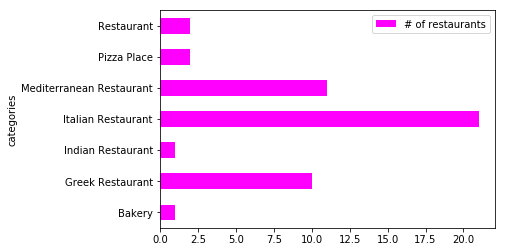

In [37]:
tor_grpd.plot.barh(color='magenta')

### Determining unique venues categories

In [38]:
print('There are {} uniques restaurant categories.'.format(len(tor_food_filtered['categories'].unique())))

There are 7 uniques restaurant categories.


### Ploting all restaurant categories on Toronto map

In [41]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13)
# add a red circle marker to represent Toronto
folium.features.CircleMarker(
    [latitude, longitude],
    radius=100,
    color='red',
    popup='Toronto',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.1
).add_to(venues_map)


# add all venues as blue circle markers
for lat, lng, categories in zip(tor_food_filtered.lat, tor_food_filtered.lng, tor_food_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='green',
        popup=categories,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

venues_map

### Grouping  restaurants by their categories

In [40]:
tor_food_filtered.groupby('categories').count()

,name,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
categories,,,,,,,,,,,,,,,
Bakery,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
Greek Restaurant,10,8,10,10,10,8,10,10,10,10,10,0,6,10,10
Indian Restaurant,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1
Italian Restaurant,21,16,21,19,21,10,21,21,21,21,21,1,15,19,21
Mediterranean Restaurant,11,8,11,10,11,6,11,11,11,11,11,0,5,10,11
Pizza Place,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2
Restaurant,2,2,2,2,2,1,2,2,2,2,2,0,2,2,2


### Clustering categories by restaurants' addresses

In [42]:
# one hot encoding
tor_onehot = pd.get_dummies(tor_food_filtered[['address']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
tor_onehot['categories'] = tor_food_filtered['categories'] 

# move neighborhood column to the first column
fixed_columns = [tor_onehot.columns[-1]] + list(tor_onehot.columns[:-1])
tor_onehot = tor_onehot[fixed_columns]

tor_onehot.head()

,categories,10 Dundas St. E,10 Dundas St. E.,100 Yonge (Scotia Plaza),101 College St,101 Dundas St E,120 Adelaide St. W,121 Richmond St. W,13 Elm St,132 Yonge Street,133 Richmond St. W,133 Richmond Street West,15 Elm Street,20 Victoria Street,205 Dundas St W,"220 Yonge St, Toronto Eaton Centre",220 Yonge St.,300 Jarvis (In Ramada Plaza),36 Toronto St.,37 Elm St.,372 Yonge St.,"382 Yonge Street, Unit #7","4 King Street West, Suite 102",456 danforth ave,525 University Ave #3,555 University Ave,57 Adelaide St. E,595 Bay St,595 Bay St.,60 Queen St E,650 Bay Street,66 Gerrard St E,700 University Ave,800 Bay St,87 Elm St,Mars,Richmond-Adelaide Centre
0,Greek Restaurant,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Greek Restaurant,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Restaurant,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Italian Restaurant,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Italian Restaurant,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
tor_onehot.shape

(48, 37)

In [44]:
tor_grouped = tor_onehot.groupby('categories').mean().reset_index()
tor_grouped.head(10)

,categories,10 Dundas St. E,10 Dundas St. E.,100 Yonge (Scotia Plaza),101 College St,101 Dundas St E,120 Adelaide St. W,121 Richmond St. W,13 Elm St,132 Yonge Street,133 Richmond St. W,133 Richmond Street West,15 Elm Street,20 Victoria Street,205 Dundas St W,"220 Yonge St, Toronto Eaton Centre",220 Yonge St.,300 Jarvis (In Ramada Plaza),36 Toronto St.,37 Elm St.,372 Yonge St.,"382 Yonge Street, Unit #7","4 King Street West, Suite 102",456 danforth ave,525 University Ave #3,555 University Ave,57 Adelaide St. E,595 Bay St,595 Bay St.,60 Queen St E,650 Bay Street,66 Gerrard St E,700 University Ave,800 Bay St,87 Elm St,Mars,Richmond-Adelaide Centre
0,Bakery,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1,Greek Restaurant,0.000000,0.1,0.1,0.000000,0.1,0.0,0.000000,0.000000,0.0,0.1,0.0,0.000000,0.000000,0.000000,0.0,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.1,0.1,0.000000,0.000000,0.000000,0.000000
2,Indian Restaurant,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
3,Italian Restaurant,0.047619,0.0,0.0,0.047619,0.0,0.0,0.047619,0.047619,0.0,0.0,0.0,0.047619,0.047619,0.000000,0.0,0.047619,0.047619,0.000000,0.047619,0.000000,0.047619,0.000000,0.0,0.047619,0.000000,0.047619,0.047619,0.0,0.000000,0.000000,0.0,0.0,0.047619,0.047619,0.047619,0.000000
4,Mediterranean Restaurant,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.090909,0.0,0.000000,0.000000,0.090909,0.000000,0.090909,0.000000,0.090909,0.0,0.000000,0.090909,0.000000,0.000000,0.0,0.090909,0.090909,0.0,0.0,0.000000,0.000000,0.000000,0.090909
5,Pizza Place,0.000000,0.0,0.0,0.000000,0.0,0.5,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
6,Restaurant,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.5,0.000000,0.000000,0.000000,0.000000


In [45]:
tor_grouped.shape

(7, 37)

In [46]:
# set number of clusters
kclusters = 7

tor_grouped_clustering = tor_grouped.drop('categories', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(tor_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 5, 1, 6, 0, 3, 4], dtype=int32)

In [47]:
# add clustering labels
tor_grouped.insert(0, 'Cluster Labels', kmeans.labels_)

tor_merged = tor_food_filtered

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
tor_merged = tor_merged.join(tor_grouped.set_index('categories'), on='categories')

tor_merged.head(50) # check the last columns!

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id,Cluster Labels,10 Dundas St. E,10 Dundas St. E.,100 Yonge (Scotia Plaza),101 College St,101 Dundas St E,120 Adelaide St. W,121 Richmond St. W,13 Elm St,132 Yonge Street,133 Richmond St. W,133 Richmond Street West,15 Elm Street,20 Victoria Street,205 Dundas St W,"220 Yonge St, Toronto Eaton Centre",220 Yonge St.,300 Jarvis (In Ramada Plaza),36 Toronto St.,37 Elm St.,372 Yonge St.,"382 Yonge Street, Unit #7","4 King Street West, Suite 102",456 danforth ave,525 University Ave #3,555 University Ave,57 Adelaide St. E,595 Bay St,595 Bay St.,60 Queen St E,650 Bay Street,66 Gerrard St E,700 University Ave,800 Bay St,87 Elm St,Mars,Richmond-Adelaide Centre
0,Opa! Souvlaki of Greece,Greek Restaurant,10 Dundas St. E.,CA,Toronto,Canada,2nd Floor in Yonge Dundas Square,15,[10 Dundas St. E. (2nd Floor in Yonge Dundas S...,"[{'label': 'display', 'lat': 43.65618684017071...",43.656187,-79.380921,NaN,M5B 2G9,ON,4bce340fb6c49c74c8c79691,5,0.000000,0.1,0.1,0.000000,0.1,0.0,0.000000,0.000000,0.0,0.1,0.0,0.000000,0.000000,0.000000,0.0,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.1,0.1,0.000000,0.000000,0.000000,0.000000
1,Jimmy The Greek,Greek Restaurant,220 Yonge St.,CA,Toronto,Canada,"in Urban Eatery, Toronto Eaton Centre",202,"[220 Yonge St. (in Urban Eatery, Toronto Eaton...","[{'label': 'display', 'lat': 43.6545029224916,...",43.654503,-79.380888,NaN,M5B 2H1,ON,4e8889c961afee1b75b4cc4a,5,0.000000,0.1,0.1,0.000000,0.1,0.0,0.000000,0.000000,0.0,0.1,0.0,0.000000,0.000000,0.000000,0.0,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.1,0.1,0.000000,0.000000,0.000000,0.000000
2,Villa Madina,Restaurant,"220 Yonge St, Toronto Eaton Centre",CA,Toronto,Canada,Eaton Centre,251,"[220 Yonge St, Toronto Eaton Centre (Eaton Cen...","[{'label': 'display', 'lat': 43.654064, 'lng':...",43.654064,-79.380696,NaN,M5B 2H1,ON,5372b900498e1ecf3da2bcaa,4,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.5,0.000000,0.000000,0.000000,0.000000
3,Elm Street Italian Deli,Italian Restaurant,15 Elm Street,CA,Toronto,Canada,NaN,197,"[15 Elm Street, Toronto ON M5G 1G7, Canada]","[{'label': 'display', 'lat': 43.65769, 'lng': ...",43.657690,-79.382480,NaN,M5G 1G7,ON,5e594c8a3de308000870c948,6,0.047619,0.0,0.0,0.047619,0.0,0.0,0.047619,0.047619,0.0,0.0,0.0,0.047619,0.047619,0.000000,0.0,0.047619,0.047619,0.000000,0.047619,0.000000,0.047619,0.000000,0.0,0.047619,0.000000,0.047619,0.047619,0.0,0.000000,0.000000,0.0,0.0,0.047619,0.047619,0.047619,0.000000
4,Trattoria Mercatto,Italian Restaurant,220 Yonge St.,CA,Toronto,Canada,in Toronto Eaton Centre,208,"[220 Yonge St. (in Toronto Eaton Centre), Toro...","[{'label': 'display', 'lat': 43.65445314470199...",43.654453,-79.380974,NaN,M5B 3H7,ON,4d306dd82748b60c62b6dba0,6,0.047619,0.0,0.0,0.047619,0.0,0.0,0.047619,0.047619,0.0,0.0,0.0,0.047619,0.047619,0.000000,0.0,0.047619,0.047619,0.000000,0.047619,0.000000,0.047619,0.000000,0.0,0.047619,0.000000,0.047619,0.047619,0.0,0.000000,0.000000,0.0,0.0,0.047619,0.047619,0.047619,0.000000
5,Sauté Rosé,Italian Restaurant,10 Dundas St. E,CA,Toronto,Canada,at Yonge St.,16,"[10 Dundas St. E (at Yonge St.), Toronto ON M5...","[{'label': 'display', 'lat': 43.65617906966643...",43.656179,-79.380863,NaN,M5B 2G9,ON,4b8d5a5df964a52078f632e3,6,0.047619,0.0,0.0,0.047619,0.0,0.0,0.047619,0.047619,0.0,0.0,0.0,0.047619,0.047619,0.000000,0.0,0.047619,0.047619,0.000000,0.047619,0.000000,0.047619,0.000000,0.0,0.047619,0.000000,0.047619,0.047619,0.0,0.000000,0.000000,0.0,0.0,0.047619,0.047619,0.047619,0.000000
6,Osmow’s,Mediterranean Restaurant,NaN,CA

In [48]:
# create map
tor_clusters = folium.Map(location=[latitude, longitude], zoom_start=14)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(1, 0, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(tor_merged['lat'], tor_merged['lng'], tor_merged['categories'], tor_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=1).add_to(tor_clusters)
#add map legend
from folium.plugins import FloatImage
legend_image = 'https://vladimirtrajkovic.com/wp-content/uploads/2020/08/LegendRestaurants.png'
FloatImage(legend_image, bottom=5, left=80).add_to(tor_clusters)

tor_clusters